In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import array

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense 

Se cuenta con datos de temperatura (TMP) correspodientes a la estacion ACO (Acolman), ubicada en el Estado de México en la comunidad Acolman de Nezahualcóyotl, al NE en la CDMX, dicha estacion forma parte de la Red de Meteorología y Radiación Solar (REDMET), los datos corresponden al periodo que va del 25/08/2022 al 01/05/2023, contando con un total de 5689 observaciones.

|cve_estac|	nom_estac|	longitud |	latitud|	alt|obs_estac	id_station|
|---------|----------|-----------|---------|-------|----------------------|
|ACO      |	Acolman  | -98.912003|19.635501|   2198|	   484150020109.00|


In [142]:
#LEER TABLA DE DATOS
TMP = pd.read_csv('C:/Users/juanj/Documents/GitHub/Aprendizaje-Profundo/Datos/acoTMP.csv', header=0,sep=",")# 25-08-22  a   01-05-2023
print(TMP)
print(len(TMP['value']))

            date  value
0     25/08/2022   12.4
1     25/08/2022   14.6
2     25/08/2022   16.7
3     25/08/2022   19.1
4     25/08/2022   20.7
...          ...    ...
5684  30/04/2023   19.8
5685  30/04/2023   18.6
5686  30/04/2023   17.8
5687  30/04/2023   16.8
5688  01/05/2023   15.6

[5689 rows x 2 columns]
5689


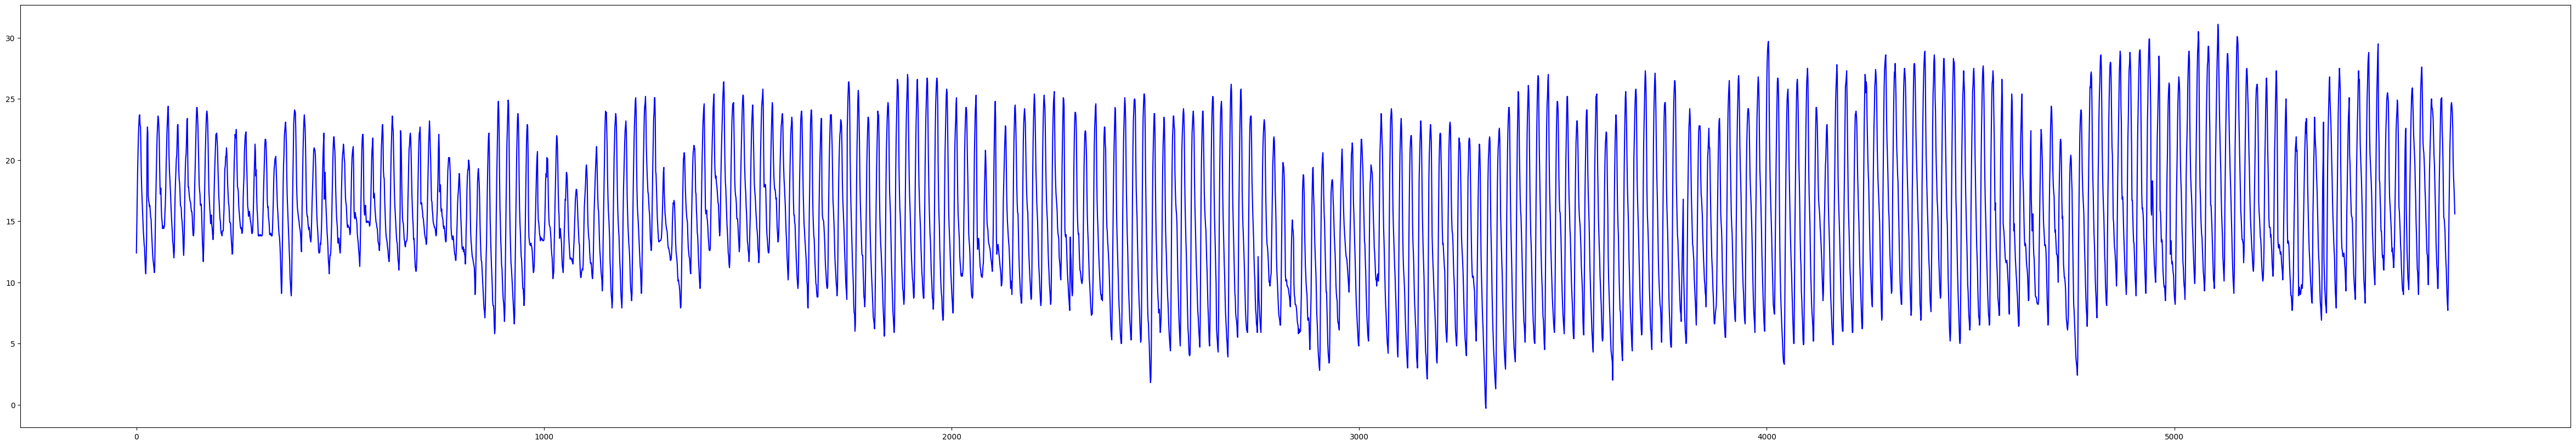

In [143]:
plt.figure(figsize=(60, 10), linewidth=1)
plt.plot(TMP.iloc[:,1],color="blue")

Los Datos los trasformaremoa en una lista y posteriormente aremos un arreglo de 9 predictoras, es decir, partiremos la lista en 9 secciones, correspondientes a cada mes, que corresponderan a los datos de entrenamiento.

In [144]:
secuenciaTMP = list(TMP.iloc[:,1]) # seleccionamos todo el rango de la col 1
secuenciaTMP


[12.4,
 14.6,
 16.7,
 19.1,
 20.7,
 22.0,
 22.9,
 23.6,
 23.7,
 22.9,
 22.7,
 21.1,
 18.9,
 17.6,
 16.8,
 15.9,
 15.0,
 14.2,
 13.7,
 13.1,
 12.8,
 11.9,
 11.1,
 10.7,
 11.8,
 13.7,
 21.4,
 22.7,
 22.2,
 17.1,
 16.7,
 16.5,
 16.2,
 16.3,
 15.8,
 15.3,
 15.2,
 14.3,
 13.6,
 13.0,
 12.2,
 11.8,
 11.5,
 11.2,
 10.8,
 11.3,
 13.6,
 15.8,
 17.6,
 19.2,
 20.8,
 22.1,
 22.8,
 23.6,
 23.4,
 22.8,
 21.8,
 19.5,
 17.7,
 17.2,
 17.7,
 16.2,
 15.3,
 15.0,
 14.4,
 14.5,
 14.6,
 14.4,
 14.5,
 14.7,
 15.7,
 16.4,
 17.7,
 19.6,
 20.8,
 22.3,
 23.1,
 24.0,
 24.4,
 22.9,
 20.4,
 19.2,
 18.5,
 17.9,
 17.1,
 16.1,
 15.4,
 14.7,
 14.2,
 13.4,
 13.1,
 12.5,
 12.0,
 12.6,
 15.3,
 17.2,
 18.3,
 19.2,
 20.1,
 20.4,
 21.6,
 22.9,
 22.9,
 21.1,
 19.2,
 18.4,
 18.1,
 17.4,
 16.3,
 16.2,
 16.1,
 15.3,
 15.0,
 14.5,
 13.9,
 12.8,
 12.2,
 13.1,
 15.5,
 17.7,
 19.3,
 20.2,
 20.5,
 21.7,
 23.3,
 23.4,
 20.2,
 17.8,
 17.8,
 17.4,
 17.0,
 16.8,
 16.6,
 16.5,
 16.1,
 15.8,
 15.8,
 15.4,
 14.5,
 13.9,
 13.8,
 14.1,
 16.0,

In [145]:
#descomponer la lista en dos arregolos
#9 de entrenamiento y 1  de y

def DescomponerSerie(serie,longitud):
    global X,y
    X, y=list(), list()
    for i in range(len(serie)):
        final=i+longitud
        if final> len(serie)-1:
            break
        historia_x, target_y=serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return array(X), array(y)
# ejecutaremos sobre los datos para agruparlos
DescomponerSerie(secuenciaTMP,8)

(array([[12.4, 14.6, 16.7, ..., 22. , 22.9, 23.6],
        [14.6, 16.7, 19.1, ..., 22.9, 23.6, 23.7],
        [16.7, 19.1, 20.7, ..., 23.6, 23.7, 22.9],
        ...,
        [23.5, 24.5, 24.7, ..., 22.6, 19.8, 18.6],
        [24.5, 24.7, 24.4, ..., 19.8, 18.6, 17.8],
        [24.7, 24.4, 23.9, ..., 18.6, 17.8, 16.8]]),
 array([23.7, 22.9, 22.7, ..., 17.8, 16.8, 15.6]))

In [146]:
for i in range(len(X)):
    print(X[i],y[i])

[12.4, 14.6, 16.7, 19.1, 20.7, 22.0, 22.9, 23.6] 23.7
[14.6, 16.7, 19.1, 20.7, 22.0, 22.9, 23.6, 23.7] 22.9
[16.7, 19.1, 20.7, 22.0, 22.9, 23.6, 23.7, 22.9] 22.7
[19.1, 20.7, 22.0, 22.9, 23.6, 23.7, 22.9, 22.7] 21.1
[20.7, 22.0, 22.9, 23.6, 23.7, 22.9, 22.7, 21.1] 18.9
[22.0, 22.9, 23.6, 23.7, 22.9, 22.7, 21.1, 18.9] 17.6
[22.9, 23.6, 23.7, 22.9, 22.7, 21.1, 18.9, 17.6] 16.8
[23.6, 23.7, 22.9, 22.7, 21.1, 18.9, 17.6, 16.8] 15.9
[23.7, 22.9, 22.7, 21.1, 18.9, 17.6, 16.8, 15.9] 15.0
[22.9, 22.7, 21.1, 18.9, 17.6, 16.8, 15.9, 15.0] 14.2
[22.7, 21.1, 18.9, 17.6, 16.8, 15.9, 15.0, 14.2] 13.7
[21.1, 18.9, 17.6, 16.8, 15.9, 15.0, 14.2, 13.7] 13.1
[18.9, 17.6, 16.8, 15.9, 15.0, 14.2, 13.7, 13.1] 12.8
[17.6, 16.8, 15.9, 15.0, 14.2, 13.7, 13.1, 12.8] 11.9
[16.8, 15.9, 15.0, 14.2, 13.7, 13.1, 12.8, 11.9] 11.1
[15.9, 15.0, 14.2, 13.7, 13.1, 12.8, 11.9, 11.1] 10.7
[15.0, 14.2, 13.7, 13.1, 12.8, 11.9, 11.1, 10.7] 11.8
[14.2, 13.7, 13.1, 12.8, 11.9, 11.1, 10.7, 11.8] 13.7
[13.7, 13.1, 12.8, 11.9, 11.

Se define el modelo que se empleara
se empleara la funcion de activacion RELU ya que estaremos analizando valores continuos en el tiempo
ocupando 4 neuronas en la capa oculta, las cuales tendran una entrada de 8 va

In [147]:
model = Sequential()
#7 entradas de datos y 5 neuronas
model.add(Dense(4, input_dim=8, activation='relu'))
#1 saknoinoin
model.add(Dense(1))

In [148]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [149]:
len(X)

5681

In [150]:
# Entrenamiento del modelo
# se entrenara por 200 epocas
# tamaño del lote 10
model.fit(X, y, epochs=300, batch_size=10)

Epoch 1/300
569/569 [==============================] - 2s 2ms/step - loss: 69.7819 - accuracy: 0.0000e+00
Epoch 2/300
569/569 [==============================] - 1s 1ms/step - loss: 23.1728 - accuracy: 0.0000e+00
Epoch 3/300
569/569 [==============================] - 1s 1ms/step - loss: 13.1366 - accuracy: 0.0000e+00
Epoch 4/300
569/569 [==============================] - 1s 1ms/step - loss: 7.8134 - accuracy: 0.0000e+00
Epoch 5/300
569/569 [==============================] - 1s 1ms/step - loss: 4.3791 - accuracy: 0.0000e+00
Epoch 6/300
569/569 [==============================] - 1s 1ms/step - loss: 2.3961 - accuracy: 0.0000e+00
Epoch 7/300
569/569 [==============================] - 1s 972us/step - loss: 1.6995 - accuracy: 0.0000e+00
Epoch 8/300
569/569 [==============================] - 1s 1ms/step - loss: 1.5167 - accuracy: 0.0000e+00
Epoch 9/300
569/569 [==============================] - 1s 1ms/step - loss: 1.4409 - accuracy: 0.0000e+00
Epoch 10/300
569/569 [============================

In [151]:
#guardamos la prediccion en un array 
predictions = model.predict(X)
predictions = pd.DataFrame(predictions)
predictions.columns = ["predictions"]

Real=pd.DataFrame(y)
Real.columns = ["Real"]

RealPredictions=pd.concat([predictions,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

178/178 [==============================] - 0s 1ms/step


,predictions,Real
0,23.628147,23.7
1,22.881979,22.9
2,20.913347,22.7
3,21.183119,21.1
4,18.962107,18.9


In [152]:
len(RealPredictions)

5681

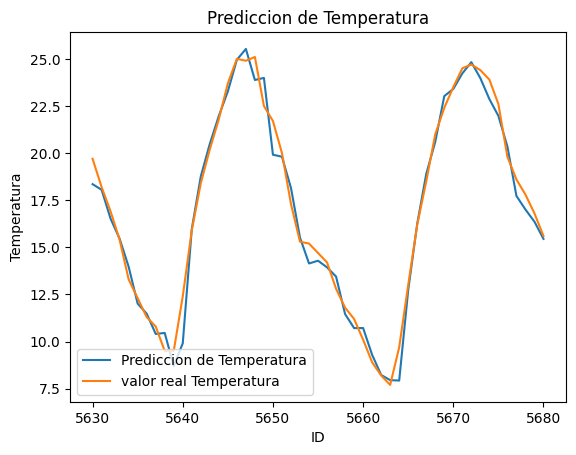

In [153]:
plt.plot(RealPredictions.iloc[5630:5682,0], label='Prediccion de Temperatura')
plt.plot(RealPredictions.iloc[5630:5685,1], label='valor real Temperatura')
plt.xlabel('ID')
plt.ylabel('Temperatura')
plt.title('Prediccion de Temperatura')
plt.legend()

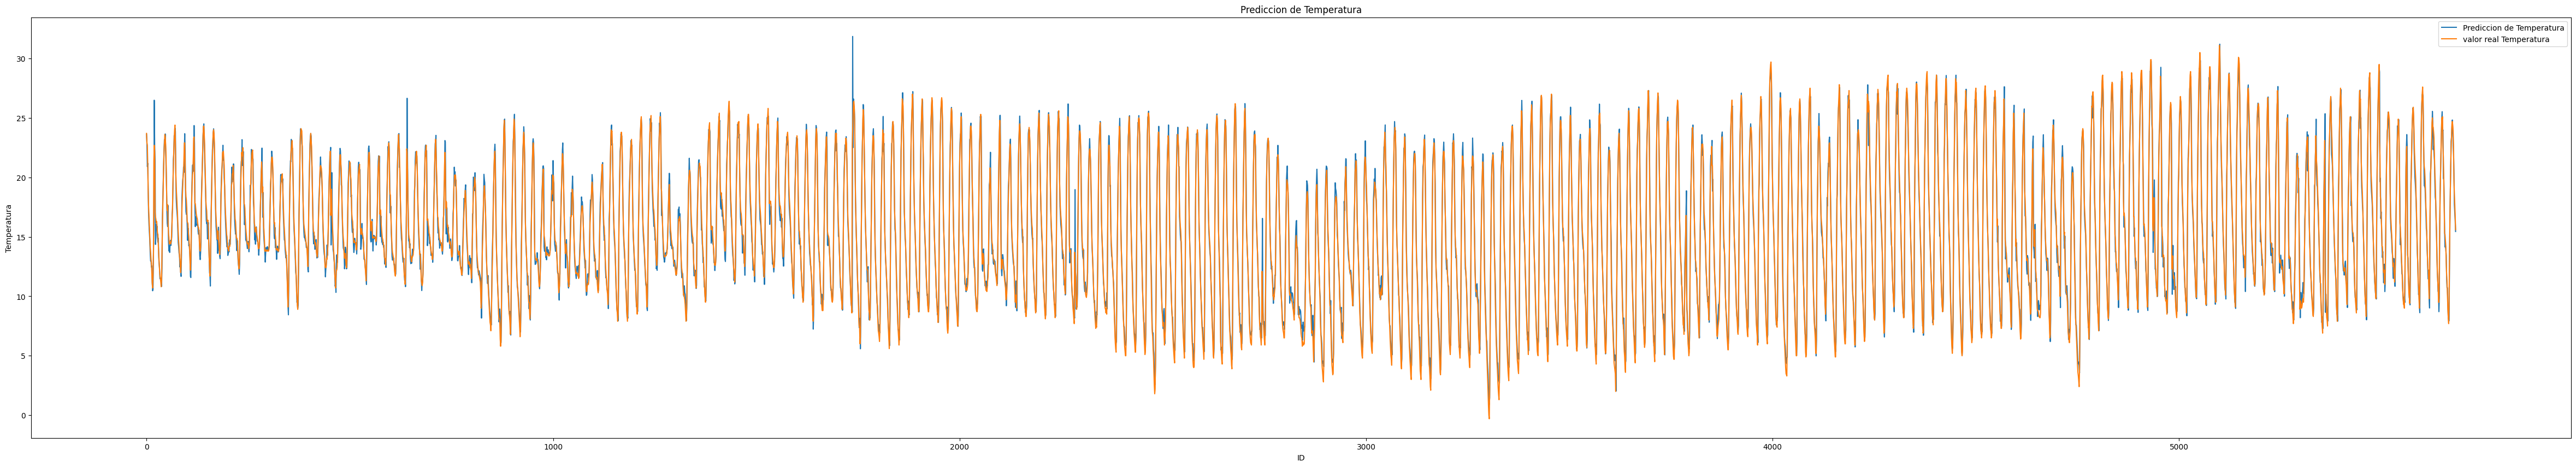

In [154]:
plt.figure(figsize=(60, 10), linewidth=1)
plt.plot(RealPredictions.iloc[:,0], label='Prediccion de Temperatura')
plt.plot(RealPredictions.iloc[:,1], label='valor real Temperatura')
plt.xlabel('ID')
plt.ylabel('Temperatura')
plt.title('Prediccion de Temperatura')
plt.legend()



Acontinuacion se realizara la prediccion de datos que aun no existen

In [155]:
RealPredictions.iloc[5677:5686,1]

5677    18.6
5678    17.8
5679    16.8
5680    15.6
Name: Real, dtype: float64

In [157]:
#acontinuaciin se realizara la prediccion de Temperatura para una semana no incluida en el DataSet

#valores para prediccion

x_input = array([(RealPredictions.iloc[5649:5657,1]),
                 (RealPredictions.iloc[5657:5665,1]),
                 (RealPredictions.iloc[5665:5673,1]),
                 (RealPredictions.iloc[5673:5681,1])]) #resultados de las ultimas 168 horas, es decier 7 dias
x_input = x_input.reshape((4,8))# 4x8
x_input

array([[22.5, 21.7, 20. , 17.3, 15.3, 15.2, 14.7, 14.2],
       [12.8, 11.8, 11.2, 10.1,  8.9,  8.2,  7.7,  9.7],
       [13. , 16.2, 18.5, 21. , 22.4, 23.5, 24.5, 24.7],
       [24.4, 23.9, 22.6, 19.8, 18.6, 17.8, 16.8, 15.6]])

In [158]:
yhat = model.predict(x_input) # 4x8
yhat = float(yhat[0,0])
print(yhat)

1/1 [==============================] - 0s 36ms/step
13.448966979980469


In [159]:
#agregamos la prediccion
Resultados = pd.DataFrame(x_input.reshape(-1,1), columns=['Resultados'])
Prediction = pd.DataFrame({'Resultados':[yhat]})
Resultados = pd.concat([Resultados, Prediction], ignore_index=True)
Resultados

,Resultados
0,22.500000
1,21.700000
2,20.000000
3,17.300000
4,15.300000
5,15.200000
6,14.700000
7,14.200000
8,12.800000
9,11.800000


Se genera un bucle while que se ejecuta 24 veces, ya que la base de datos se divide en ciclos de 24 datos correspondientes a una toma de medida de Temperatura por cada hora del dia, Cada iteración del bucle crea una matriz 'x_input' con 4 filas y 8 columnas, donde cada elemento se toma del DataFrame 'Resultados'. La matriz se remodela para tener dimensiones de 4 por 8, una ves se ajustan las dimenciones de la matriz, el modelo realiza una predicción utilizando esta entrada, que se almacena en la variable 'yhat', y por ultimo, esta predicción se agrega al final del DataFrame de Resultados. Finalmente, el contador de bucle i se incrementa en 1.

In [ ]:
#se realizara la prediccion que se tendra a lo largo del dia
i=0
while i<24:
    x_input = array([(Resultados.loc[0+i,'Resultados'],Resultados.loc[1+i,'Resultados'],Resultados.loc[2+i,'Resultados'],Resultados.loc[3+i,'Resultados'],Resultados.loc[4+i,'Resultados'],Resultados.loc[5+i,'Resultados'],Resultados.loc[6+i,'Resultados'],Resultados.loc[7+i,'Resultados']),
                     (Resultados.loc[0+i,'Resultados'],Resultados.loc[1+i,'Resultados'],Resultados.loc[2+i,'Resultados'],Resultados.loc[3+i,'Resultados'],Resultados.loc[4+i,'Resultados'],Resultados.loc[5+i,'Resultados'],Resultados.loc[6+i,'Resultados'],Resultados.loc[7+i,'Resultados']),
                     (Resultados.loc[0+i,'Resultados'],Resultados.loc[1+i,'Resultados'],Resultados.loc[2+i,'Resultados'],Resultados.loc[3+i,'Resultados'],Resultados.loc[4+i,'Resultados'],Resultados.loc[5+i,'Resultados'],Resultados.loc[6+i,'Resultados'],Resultados.loc[7+i,'Resultados']),
                     (Resultados.loc[0+i,'Resultados'],Resultados.loc[1+i,'Resultados'],Resultados.loc[2+i,'Resultados'],Resultados.loc[3+i,'Resultados'],Resultados.loc[4+i,'Resultados'],Resultados.loc[5+i,'Resultados'],Resultados.loc[6+i,'Resultados'],Resultados.loc[7+i,'Resultados'])])
    x_input = x_input.reshape((4,8))

    yhat = model.predict(x_input)
    yhat =float(yhat[0,0])
    
    Prediction = pd.DataFrame({'Resultados':[yhat]})
    Resultados = pd.concat([Resultados, Prediction], ignore_index=True)
    Resultados
    
    i=i+1

Resultados

Se realiza una grafica comparando los datos de la prediccion con valores reales de temperatura para comparar la prediccion.

In [ ]:
plt.plot(Resultados, label='entrenamiento + Prediccion ')
plt.plot([22.5,21.7,20,17.3,15.3,15.2,14.7,14.2,12.8,11.8,11.2,10.1,8.9,8.2,7.7,9.7,13,16.2,
          18.5,21,22.4,23.5,24.5,24.7,24.4,23.9,22.6,19.8,18.6,17.8,16.8,15.6,
          14.7,13.9,12.7,11.2,10.2,9.6,9,10.8,15.1,18.4,20.9,22.6,23.7,24.5,25.5,25.6,25.5,
          23.9,22.7,21.5,20.3,19.2,18.7,18.1], label='valor real Temperatura')
plt.xlabel('ID')
plt.ylabel('Temperatura')
plt.title('Prediccion de Temperatura')
plt.legend()